### Futurama Episode Ratings

This notebook extracts episode ratings for the simpsons from IMDB, then visualises them in the style of a graphic made by <a href="https://public.tableau.com/profile/hannes.benne#!/vizhome/SimpsonsEpisodeRating/EpisodeRating">Hannes Benne</a>

<br>

### Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import ratings

<br>

### Data Retrieval

We use the ratings.py module to retrieve all of the data

In [2]:
show_id = 'tt0149460'

df_ratings = ratings.show_id_2_ratings_df(show_id)
    
df_ratings.head()

 [████████████████████████████████████████████████████████████] 7/7 [00:11<00:01, 1.61s/it]

,1,2,3,4,5,6,7
1,8.7,8.3,7.6,9.1,8.0,7.9,7.8
2,8.1,7.8,8.5,7.8,9.6,7.2,7.6
3,8.3,8.1,7.4,8.3,7.4,7.8,7.5
4,8.3,8.4,9.0,7.8,8.0,7.3,7.3
5,8.0,7.8,8.8,8.7,7.7,7.3,7.1


<br>

We'll quickly save it

In [3]:
df_ratings.index.name = 'episode'

df_ratings.to_csv('data/futurama_ratings.csv')

<br>

### Plotting

Before we get too far into the plot design we'll specify the colour palette

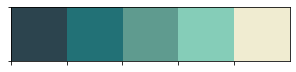

In [104]:
colors = ['#2C444E', '#227176', '#5F9B8F', '#85CDB8', '#F0ECD1']#'#9EC5AB', '#B1D8AB']
color_segment_starts = [0, 0.7, 0.75, 0.80, 0.9]

futurama_cm = ratings.create_cm(colors, color_segment_starts)

sns.palplot(sns.color_palette(colors))

<br>

Now we'll create the axes with the data

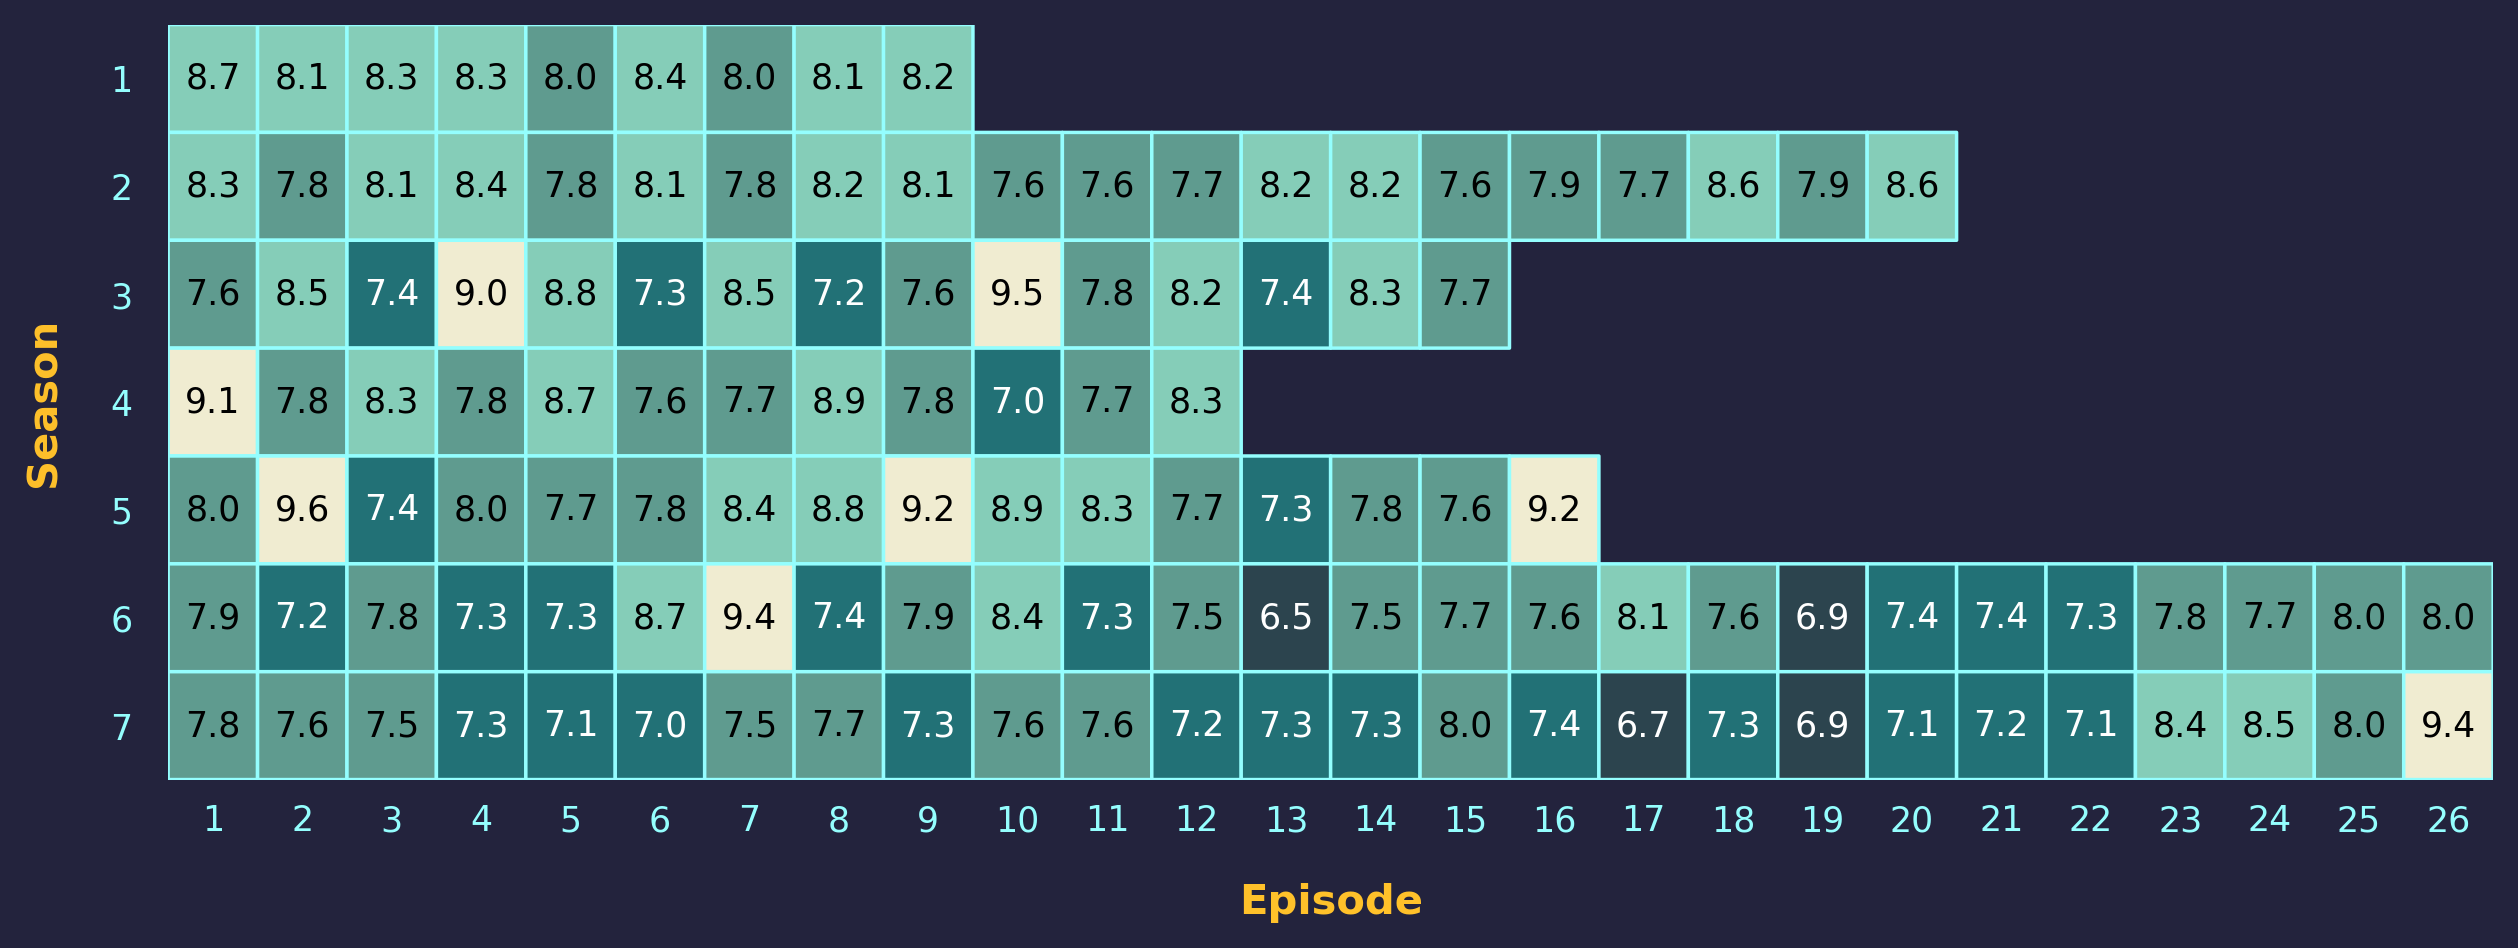

In [105]:
background = '#23233D'
grid_color = '#94FEFE'
label_color = '#FFC12A'
tick_color = '#94FEFE'
value_colors = ['white', 'black']

fig, ax = plt.subplots(dpi=250, figsize=(12, 4), facecolor=background)
ratings.plot_ratings_ax(ax, df_ratings.T, futurama_cm, background, xlabel='Episode', ylabel='Season', x_axis_top=False, text_color_threshold=7.5, grid_color=grid_color, value_colors=value_colors, xlabel_color=label_color, ylabel_color=label_color, tick_color=tick_color)

<br>

Next we can  download images for <a href="https://metro.co.uk/wp-content/uploads/2011/11/article-1321358106047-0ece9a6000000578-398673_568x379.jpg?quality=90&strip=all">characterse</a> and the <a href="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Futurama_1999_logo.svg/1200px-Futurama_1999_logo.svg.png">Futurama logo</a>, combine them (in this case outside of Python), and then plot them as a background image with the legend overlaid

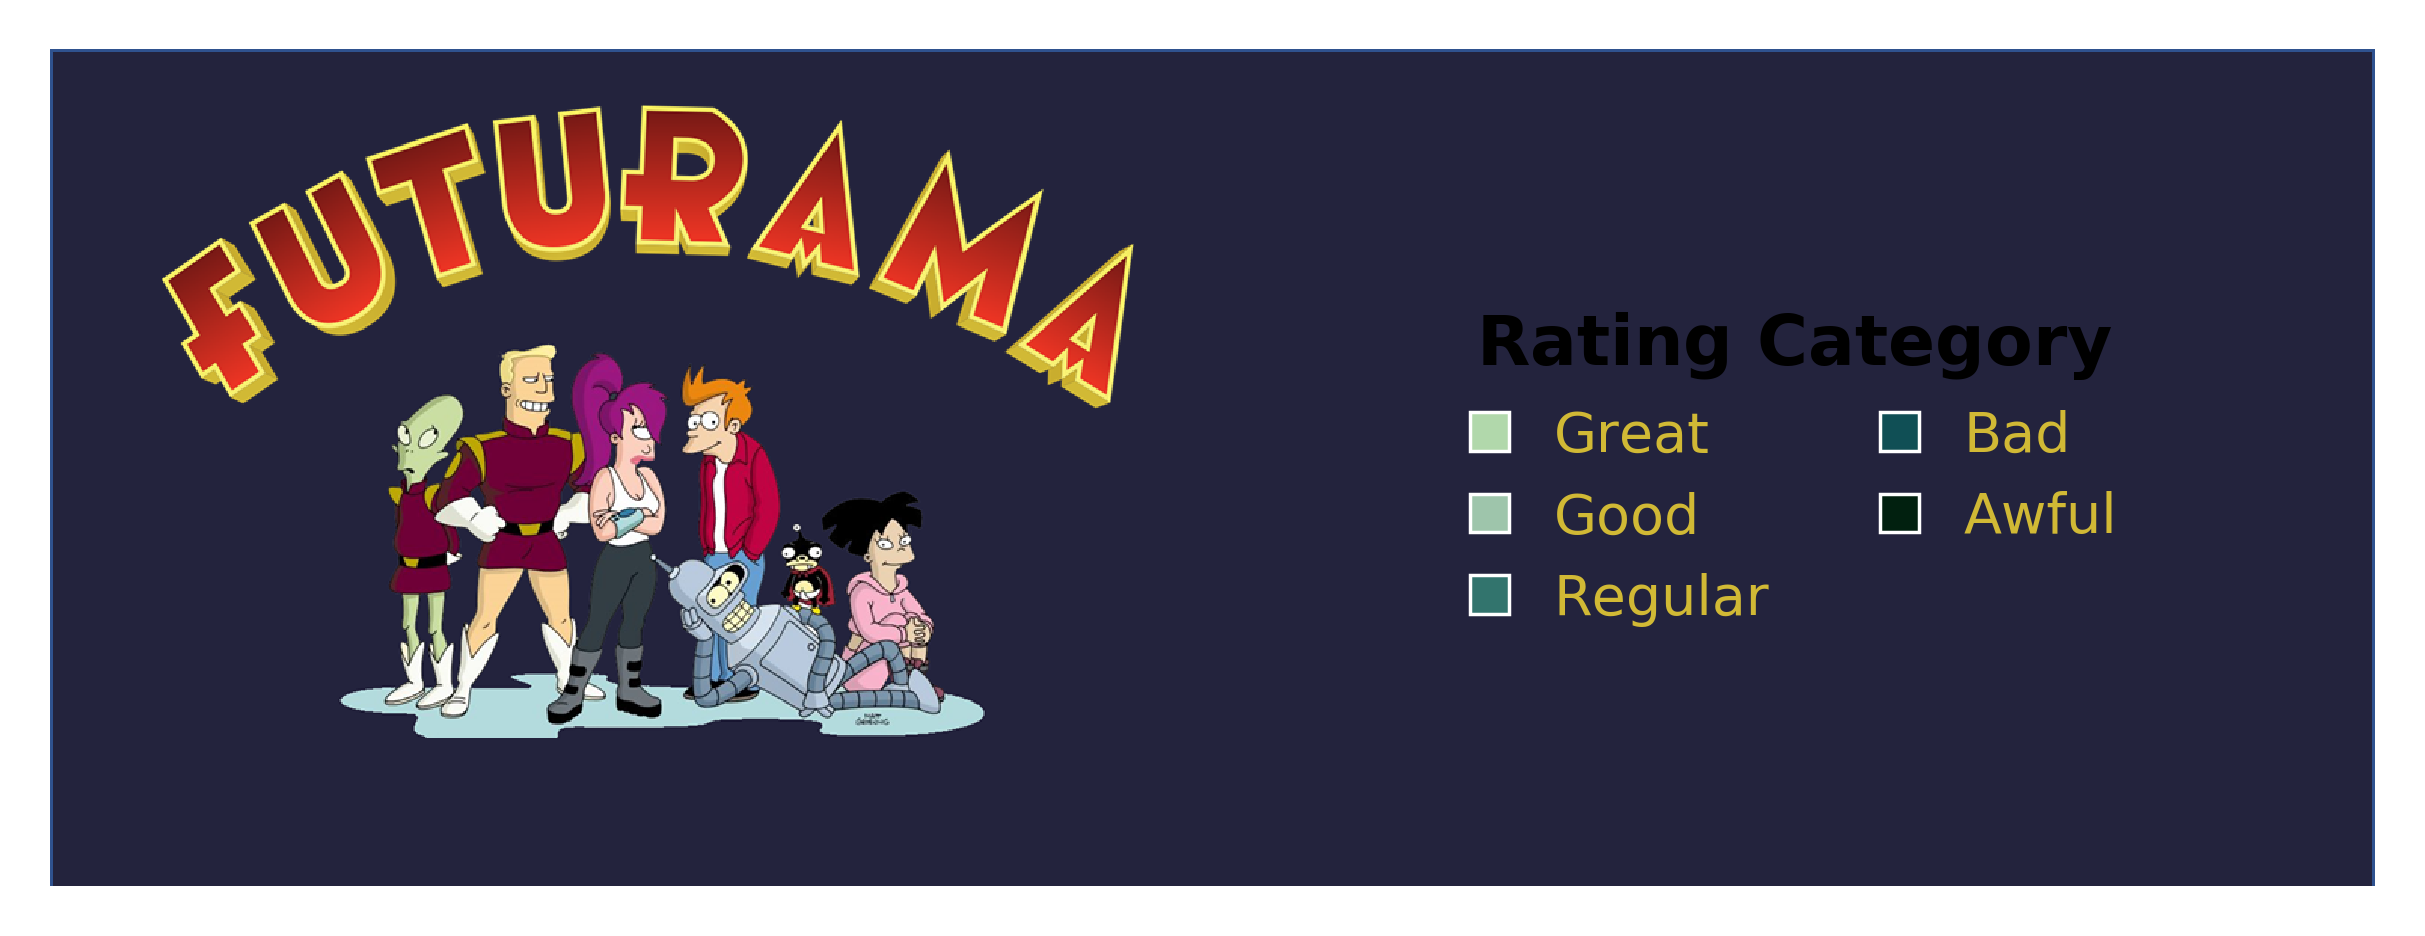

In [24]:
background_img_path = 'img/futurama/background.png'
rating_labels = ['Great', 'Good', 'Regular', 'Bad', 'Awful']
rating_colors = colors[::-1]
bbox_to_anchor = [0.75, 0.5]
title_color = '#C52B1F'
label_color = '#D1B935'

fig, ax = plt.subplots(dpi=500)
ratings.plot_info_panel(ax, background_img_path, rating_colors, rating_labels, bbox_to_anchor=bbox_to_anchor, label_fontsize=8, title_fontsize=10, label_color=label_color)

<br>

Finally we can combine these two axes within a single figure

In [106]:
background = '#23233D'
grid_color = '#94FEFE'
label_color = '#FFC12A'
tick_color = '#94FEFE'
value_colors = ['white', 'black']

background_img_path = 'img/futurama/background.png'
rating_labels = ['Great', 'Good', 'Regular', 'Bad', 'Awful']
rating_colors = colors[::-1]
bbox_to_anchor = [0.75, 0.5]
title_color = '#C52B1F'
label_color = '#f4e26e'

fig = plt.figure(dpi=750, figsize=(12, 8), facecolor=background)
gs = fig.add_gridspec(2, 1)

info_ax = fig.add_subplot(gs[0, :])
ratings_ax = fig.add_subplot(gs[1, :])

ratings.plot_info_panel(info_ax, background_img_path, rating_colors, rating_labels, 
                        bbox_to_anchor=bbox_to_anchor, label_fontsize=15, 
                        title_fontsize=18, label_color=label_color)

ratings.plot_ratings_ax(ratings_ax, df_ratings.T, futurama_cm, background, xlabel='Episode', 
                        ylabel='Season', x_axis_top=False, text_color_threshold=7.5, 
                        grid_color=grid_color, value_colors=value_colors, xlabel_color=label_color, 
                        ylabel_color=label_color, tick_color=tick_color)

fig.tight_layout()
fig.savefig('img/futurama/finished_graphic.png', facecolor=background)

<br>

After much headbanging The legend title colour was manually changed outside of Python, if you know of a way to specify it please let me know